In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("Mental Health Dataset.csv")

In [ ]:
# Overview of the dataset:

def summary(df):
    print(f'data shape: {df.shape}')
    sum = pd.DataFrame(df.dtypes, columns=['Data Type'])
    sum['Missing#'] = df.isna().sum()
    sum['Missing%'] = (df.isna().sum())/len(df)
    sum['Dups'] = df.duplicated().sum()
    sum['Uniques'] = df.nunique().values
    sum['Count'] = df.count().values

    sum['First Value'] = df.loc[0].values
    sum['Second Value'] = df.loc[1].values
    sum['Third Value'] = df.loc[2].values

    display(sum)

In [ ]:
summary(df)

data shape: (292364, 17)


,Data Type,Missing#,Missing%,Dups,Uniques,Count,First Value,Second Value,Third Value
Timestamp,object,0,0.000000,2313,580,292364,8/27/2014 11:29,8/27/2014 11:31,8/27/2014 11:32
Gender,object,0,0.000000,2313,2,292364,Female,Female,Female
Country,object,0,0.000000,2313,35,292364,United States,United States,United States
Occupation,object,0,0.000000,2313,5,292364,Corporate,Corporate,Corporate
self_employed,object,5202,0.017793,2313,2,287162,NaN,NaN,NaN
family_history,object,0,0.000000,2313,2,292364,No,Yes,Yes
treatment,object,0,0.000000,2313,2,292364,Yes,Yes,Yes
Days_Indoors,object,0,0.000000,2313,5,292364,1-14 days,1-14 days,1-14 days
Growing_Stress,object,0,0.000000,2313,3,292364,Yes,Yes,Yes
Changes_Habits,object,0,0.000000,2313,3,292364,No,No,No


In [ ]:
# Columns names are not all lowercase or uppercase, So we need to make them consistant

column_mappings = {
    'Timestamp': 'Timestamp',
    'Gender': 'Gender',
    'Country': 'Country',
    'Occupation': 'Occupation',
    'self_employed': 'Self_Employed',
    'family_history': 'Family_History',
    'treatment': 'Treatment',
    'Days_Indoors': 'Days_Indoors',
    'Growing_Stress': 'Growing_Stress',
    'Changes_Habits': 'Changes_Habits',
    'Mental_Health_History': 'Mental_Health_History',
    'Mood_Swings': 'Mood_Swings',
    'Coping_Struggles': 'Coping_Struggles',
    'Work_Interest': 'Work_Interest',
    'Social_Weakness': 'Social_Weakness',
    'mental_health_interview': 'Mental_Health_Interview',
    'care_options': 'Care_Options'
}


In [ ]:
df.rename(columns=column_mappings, inplace=True)

In [ ]:
# Print amount of duplicates
print('Amount of duplicates: {:,}'.format(df.duplicated().sum()))

# Print percentage of duplicates
print('Percentage of duplicates: {:.1%}'.format(df.duplicated().mean()))

Amount of duplicates: 2,313
Percentage of duplicates: 0.8%


In [ ]:
# Dropping the duplicates

df = df.drop_duplicates()

In [ ]:
# Print amount of duplicates
print('Amount of duplicates: {:,}'.format(df.duplicated().sum()))

# Print percentage of duplicates
print('Percentage of duplicates: {:.1%}'.format(df.duplicated().mean()))

Amount of duplicates: 0
Percentage of duplicates: 0.0%


In [ ]:
# filling the missing values with "Unkown"

df.loc[:, 'Self_Employed'] = df['Self_Employed'].fillna("Unknown")

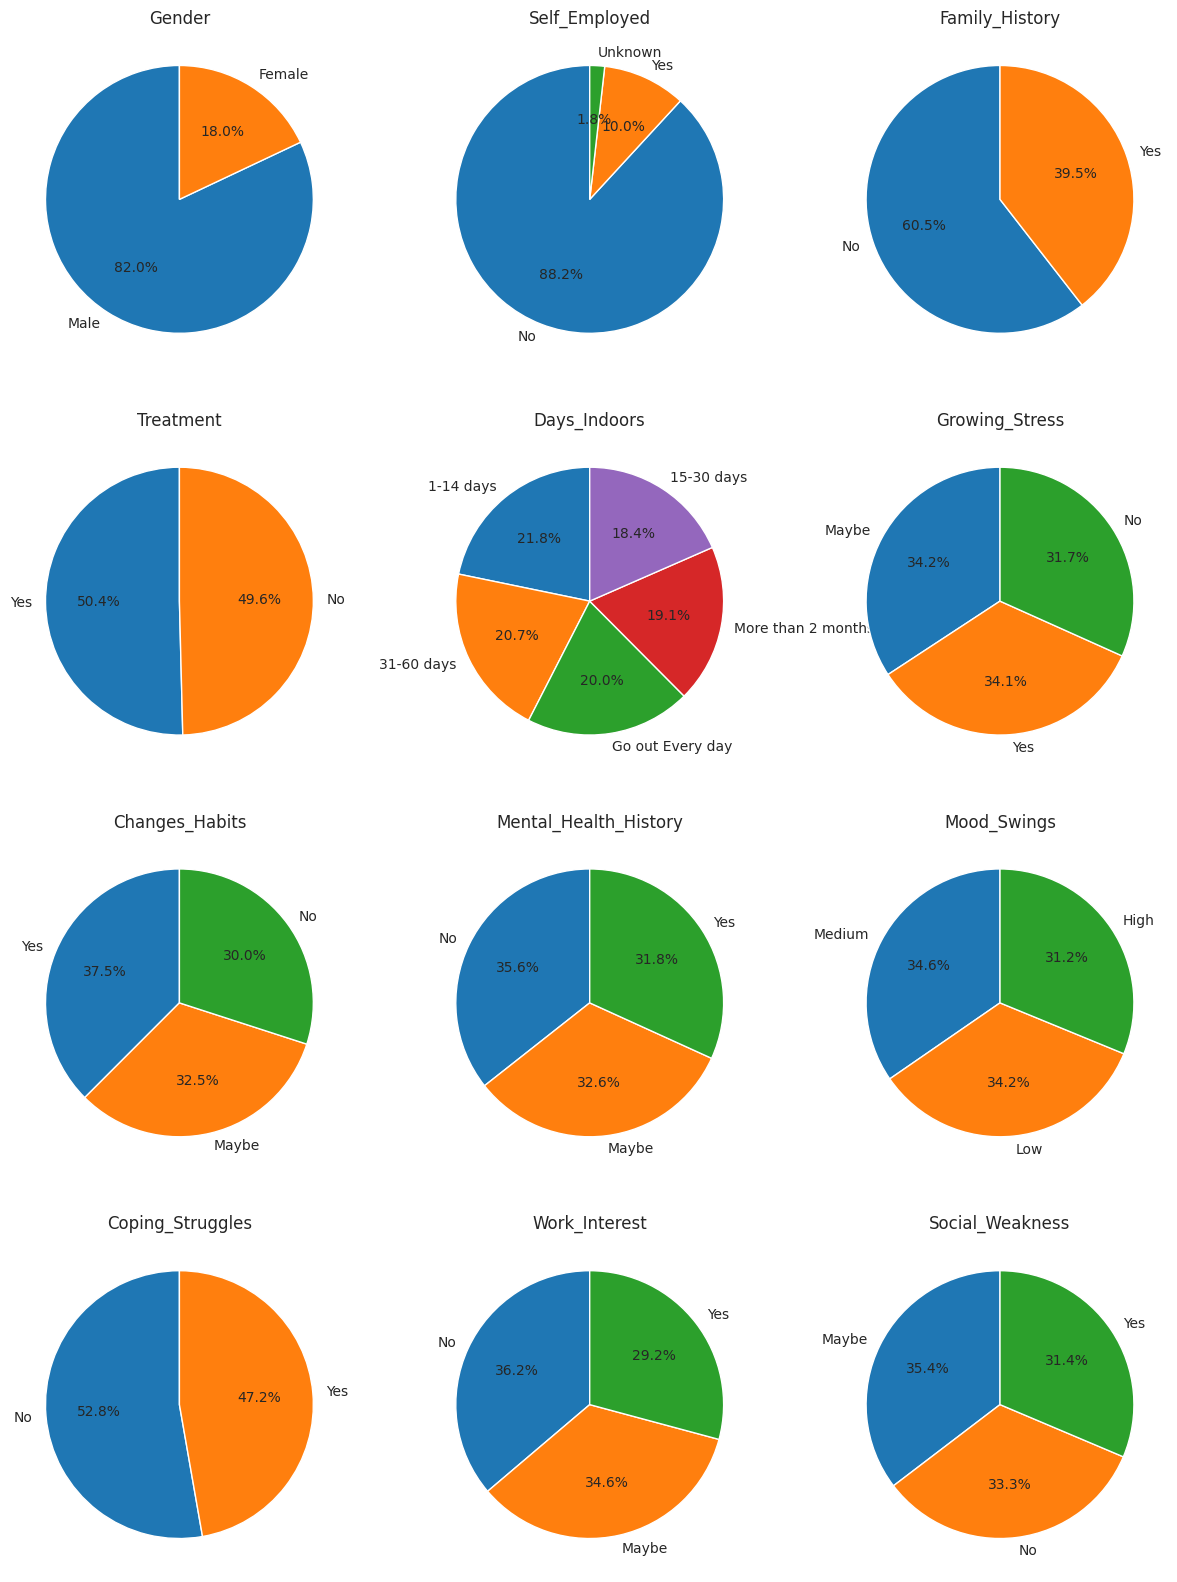

In [ ]:
# Show the distribution of categorical features:

sns.set_style("whitegrid")

cols_to_visualize = ['Gender','Self_Employed','Family_History', 'Treatment', 'Days_Indoors', 'Growing_Stress','Changes_Habits', 'Mental_Health_History', 'Mood_Swings','Coping_Struggles', 'Work_Interest', 'Social_Weakness']
counts = []

for col in cols_to_visualize:
    counts.append(df[col].value_counts())

fig, axs = plt.subplots(4, 3, figsize=(15, 20))
axs = axs.flatten()

for i, (col, count) in enumerate(zip(cols_to_visualize, counts)):
    axs[i].pie(count, labels=count.index, autopct='%1.1f%%', startangle=90)
    axs[i].set_title(col)


plt.show()

In [ ]:
"""

  Our target is Growing Stress level, which has 3 classes as we can see in above graphs:Yes (34.1%), No (31.7%), Maybe (34.2%)

"""

In [ ]:
!pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 2.0 MB/s eta 0:00:00


In [ ]:
from category_encoders import LeaveOneOutEncoder
from category_encoders.target_encoder import TargetEncoder
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

import warnings
warnings.filterwarnings("ignore")

In [ ]:
# le = LabelEncoder()

# df["Gender"] = le.fit_transform(df["Gender"])
# df["Self_Employed"] = le.fit_transform(df["Self_Employed"])
# df["Family_History"] = le.fit_transform(df["Family_History"])
# df["Treatment"] = le.fit_transform(df["Treatment"])
# df["Coping_Struggles"] = le.fit_transform(df["Coping_Struggles"])

In [ ]:
# #using one-hot encoding

# data = pd.get_dummies(data=df, columns=["Occupation", "Days_Indoors", "Mood_Swings",
#             "Changes_Habits", "Mental_Health_History", "Work_Interest", "Social_Weakness",
#             "Mental_Health_Interview", "Care_Options"])

# data = pd.get_dummies(data=data, columns=["Growing_Stress"])

In [ ]:
# leave_encoder = LeaveOneOutEncoder()
# data["Country"] = leave_encoder.fit_transform(data["Country"], data.iloc[:, -3])

In [ ]:
# data.head()

,Gender,Country,Self_Employed,Family_History,Treatment,Coping_Struggles,Occupation_Business,Occupation_Corporate,Occupation_Housewife,Occupation_Others,...,Social_Weakness_Yes,Mental_Health_Interview_Maybe,Mental_Health_Interview_No,Mental_Health_Interview_Yes,Care_Options_No,Care_Options_Not sure,Care_Options_Yes,Growing_Stress_Maybe,Growing_Stress_No,Growing_Stress_Yes
0,0,0.340906,1,0,1,0,False,True,False,False,...,True,False,True,False,False,True,False,False,False,True
1,0,0.340906,1,1,1,0,False,True,False,False,...,True,False,True,False,True,False,False,False,False,True
2,0,0.340906,1,1,1,0,False,True,False,False,...,True,False,True,False,False,False,True,False,False,True
3,0,0.340906,0,1,1,0,False,True,False,False,...,True,True,False,False,False,False,True,False,False,True
4,0,0.340906,0,1,1,0,False,True,False,False,...,True,False,True,False,False,False,True,False,False,True


In [ ]:
# use another way to convert categorical values to numerical
# Create a LabelEncoder object
le = LabelEncoder()

# Apply LabelEncoder to each column
encoded_df = df.apply(le.fit_transform)

encoded_df.head()

,Timestamp,Gender,Country,Occupation,Self_Employed,Family_History,Treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,Mental_Health_Interview,Care_Options
0,39,0,34,1,1,0,1,0,2,1,2,2,0,1,2,1,1
1,41,0,34,1,1,1,1,0,2,1,2,2,0,1,2,1,0
2,42,0,34,1,1,1,1,0,2,1,2,2,0,1,2,1,2
3,47,0,34,1,0,1,1,0,2,1,2,2,0,1,2,0,2
4,52,0,34,1,0,1,1,0,2,1,2,2,0,1,2,1,2


In [ ]:
encoded_df.drop("Timestamp", axis=1, inplace=True)

In [ ]:
# Check for imbalanced data
target_counts = df["Growing_Stress"].value_counts()
print("Target counts:")
print(target_counts)

Target counts:
Growing_Stress
Maybe    99300
Yes      98771
No       91980
Name: count, dtype: int64


We can see our dataset for "Growing Stress" is not imbalance.

In [ ]:
#Split the data:

X = encoded_df.drop("Growing_Stress", axis = 1)

y = encoded_df["Growing_Stress"]
y

0         2
1         2
2         2
3         2
4         2
         ..
292359    1
292360    1
292361    1
292362    1
292363    1
Name: Growing_Stress, Length: 290051, dtype: int64

In [ ]:
# Normalize the data using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=42)
X_train_lr, X_val_lr, y_train_lr, y_val_lr = train_test_split(X_train, y_train, test_size = 0.2, shuffle=True, random_state=42)

In [ ]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(203035, 15) (87016, 15)
(203035,) (87016,)


**Try Logistic Regression as our first model:**

In [ ]:
# LR model:

from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(multi_class='multinomial', max_iter=1000)

# Define hyperparameters grid for tuning
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l2'],
    'solver' : ['newton-cg', 'lbfgs', 'sag', 'saga']
}

lr.fit(X_train_lr, y_train_lr)
# Use GridSearchCV for hyperparameter tuning with hold-out cross-validation
grid_search = GridSearchCV(estimator=lr, param_grid=param_grid, cv=5, scoring="accuracy")

# Fit the GridSearchCV object on the training data
grid_search.fit(X_val_lr, y_val_lr)

# Get the best model
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

print("best model: ", best_model)
print("Best Hyperparameters for Logistic Regression: ", best_params)

# Test the best model on our test set
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

best model:  LogisticRegression(C=0.1, max_iter=1000, multi_class='multinomial',
                   solver='sag')
Best Hyperparameters for Logistic Regression:  {'C': 0.1, 'penalty': 'l2', 'solver': 'sag'}
Test Accuracy: 0.39592718580490943


In [ ]:
y_pred_lr = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_lr)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.39592718580490943


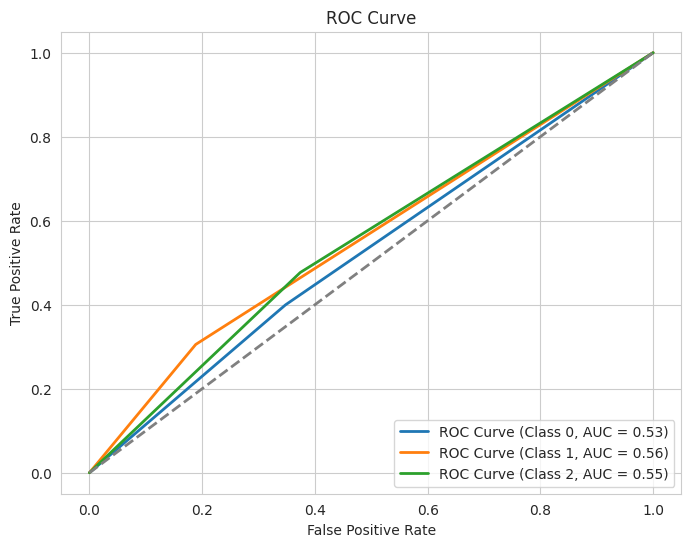

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
auc = dict()
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_pred_lr == i)
    auc[i] = roc_auc_score(y_test == i, y_pred_lr == i)

# Plot ROC curve for each class
plt.figure(figsize=(8, 6))
for i in range(3):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'ROC Curve (Class {i}, AUC = {auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


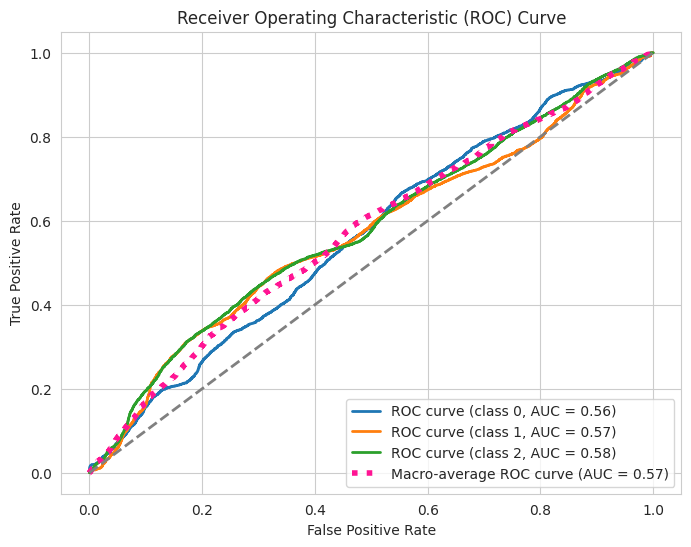

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Binarize the labels
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])

# Compute the predicted probabilities for each class
y_prob = best_model.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["macro"], tpr["macro"], _ = roc_curve(y_test_bin.ravel(), y_prob.ravel())
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot ROC curve for each class
plt.figure(figsize=(8, 6))
for i in range(3):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'ROC curve (class {i}, AUC = {roc_auc[i]:.2f})')

# Plot micro-average ROC curve
plt.plot(fpr["macro"], tpr["macro"], color='deeppink', linestyle=':', lw=4,
         label=f'Macro-average ROC curve (AUC = {roc_auc["macro"]:0.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [ ]:
#accuracy & confusion metrix:
from sklearn import metrics
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred, average='macro')
recall = metrics.recall_score(y_test, y_pred, average='macro')
f1_score = metrics.f1_score(y_test, y_pred, average = 'macro')

print('\nEvaluation Metrics: ')
print('Accuracy: ', accuracy)
print('Recall: ', recall)
print('Precision: ', precision)
print('F1 Score: ', f1_score)


Evaluation Metrics: 
Accuracy:  0.39569734301737614
Recall:  0.393660039164145
Precision:  0.39997151631017375
F1 Score:  0.3919395662112158


In [ ]:
print("\nConfusion Matrix: \n", metrics.confusion_matrix(y_test, y_pred))


Confusion Matrix: 
 [[11903  6035 11887]
 [ 9573  8428  9601]
 [10313  5173 14103]]


In [ ]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.multioutput import MultiOutputClassifier
# from sklearn.metrics import accuracy_score, roc_auc_score

# # Define logistic regression model
# logistic_regression = LogisticRegression()

# roc_auc_list = []
# accuracy_list = []

# # Fit logistic regression model for each output separately
# for i in data.iloc[:, -3:]:
#     multi_class = MultiOutputClassifier(logistic_regression)
#     multi_class.fit(X_train, y_train[[i]])
#     y_pred = multi_class.predict(X_test)

#     roc_auc = roc_auc_score(y_test[i], y_pred)
#     accuracy = accuracy_score(y_test[[i]], y_pred)

#     roc_auc_list.append(roc_auc)
#     accuracy_list.append(accuracy)

# # Calculate average ROC AUC and accuracy
# avg_roc_auc = sum(roc_auc_list) / len(roc_auc_list)
# avg_accuracy = sum(accuracy_list) / len(accuracy_list)

# print("Average ROC AUC:", avg_roc_auc)
# print("Average Accuracy:", avg_accuracy)


In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming X_train, X_test, y_train, and y_test are already defined

# Define the neural network architecture
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(3, activation='softmax')  # Assuming you have 3 output classes
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)


Epoch 1/10
5076/5076 [==============================] - 15s 3ms/step - loss: 1.1176 - accuracy: 0.3420 - val_loss: 1.0981 - val_accuracy: 0.3417
Epoch 2/10
5076/5076 [==============================] - 14s 3ms/step - loss: 1.0980 - accuracy: 0.3430 - val_loss: 1.0968 - val_accuracy: 0.3520
Epoch 3/10
5076/5076 [==============================] - 13s 3ms/step - loss: 1.0662 - accuracy: 0.4019 - val_loss: 0.9865 - val_accuracy: 0.5005
Epoch 4/10
5076/5076 [==============================] - 13s 3ms/step - loss: 0.9793 - accuracy: 0.4959 - val_loss: 0.8549 - val_accuracy: 0.6331
Epoch 5/10
5076/5076 [==============================] - 14s 3ms/step - loss: 0.9036 - accuracy: 0.5530 - val_loss: 0.7682 - val_accuracy: 0.7008
Epoch 6/10
5076/5076 [==============================] - 13s 3ms/step - loss: 0.8487 - accuracy: 0.5883 - val_loss: 0.7019 - val_accuracy: 0.7245
Epoch 7/10
5076/5076 [==============================] - 14s 3ms/step - loss: 0.8106 - accuracy: 0.6075 - val_loss: 0.6519 - val_ac

In [ ]:
#accuracy & confusion metrix:
from sklearn import metrics
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred, average='macro')
recall = metrics.recall_score(y_test, y_pred, average='macro')
f1_score = metrics.f1_score(y_test, y_pred, average = 'macro')

print('\nEvaluation Metrics: ')
print('Accuracy: ', accuracy)
print('Recall: ', recall)
print('Precision: ', precision)
print('F1 Score: ', f1_score)


Evaluation Metrics: 
Accuracy:  0.773834697067206
Recall:  0.7706823215936933
Precision:  0.8196311795792687
F1 Score:  0.7721348854213502


In [ ]:
print("\nConfusion Matrix: \n", metrics.confusion_matrix(y_test, y_pred))


Confusion Matrix: 
 [[29273   207   345]
 [ 6362 18153  3087]
 [ 8904   775 19910]]
